# LDDMM Examples

In this file we run image matching LDDMM on several examples, and demonstrate the utilities in lddmm.py.

The only special functions LDDMM needs to run are

1. Interpolation
1. FFT
1. Gradient



## Library imports
We start by importing necessary libraries.  That includes numpy, matplotlib, and tensorflow for numerical work, nibabel for loading neuroimages, and lddmm and vis which are part of this library.

In [1]:
import numpy as np # for arrays
%matplotlib notebook
import matplotlib as mpl # for graphics
import matplotlib.pyplot as plt
import nibabel as nib # for loading neuroimages
import lddmm # algorithm
import vis # visualization
import tensorflow as tf

Importing helper functions
importing vis


## Development
During development, we have to reimport any libraries we are working on.

In [2]:
# for development
import imp
vis = imp.reload(vis)
lddmm = imp.reload(lddmm)

importing vis
Importing helper functions


## Example data
We will start with some human MRI as example data.  These are two atlases from mricloud.org.  We will deform the atlas to match the target.

In [3]:
# get filenames
atlas_image_fname = 'Adt27-55_02_Adt27-55_02_MNI.img'
target_image_fname = 'Adt27-55_03_Adt27-55_03_MNI.img'

In [4]:
# load them with nibabel
fnames = [atlas_image_fname,target_image_fname]
img = [nib.load(fname) for fname in fnames]

In [5]:
# get info about domains
# we assume for this example that we have the same voxel size and same voxel spacing for atlas and target
if '.img' == atlas_image_fname[-4:]:    
    nx = img[0].header['dim'][1:4]
    dx = img[0].header['pixdim'][1:4]
else:
    # I'm only working with analyze for now
    raise ValueError('Only Analyze images supported for now')
x = [np.arange(nxi)*dxi - np.mean(np.arange(nxi)*dxi) for nxi,dxi in zip(nx,dx)]


In [6]:
# get the images, note they also include a fourth axis for time that I don't want
I = img[0].get_data()[:,:,:,0]
J = img[1].get_data()[:,:,:,0]
# in this example, images are the same size
# this can be enfored after affine registration
# In the future, we can implement different sizes

<IPython.core.display.Javascript object>


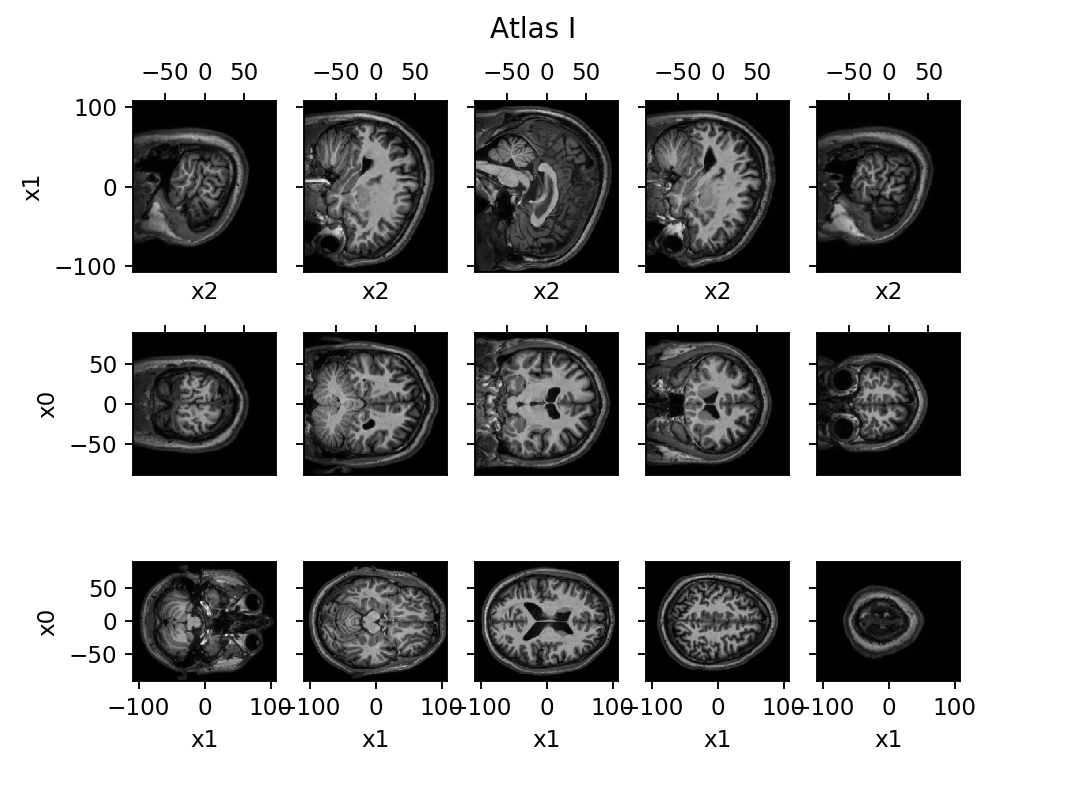

In [7]:
# display the data
f = plt.figure()
vis.imshow_slices(I,x=x,fig=f)
f.suptitle('Atlas I')
f.canvas.draw()

<IPython.core.display.Javascript object>


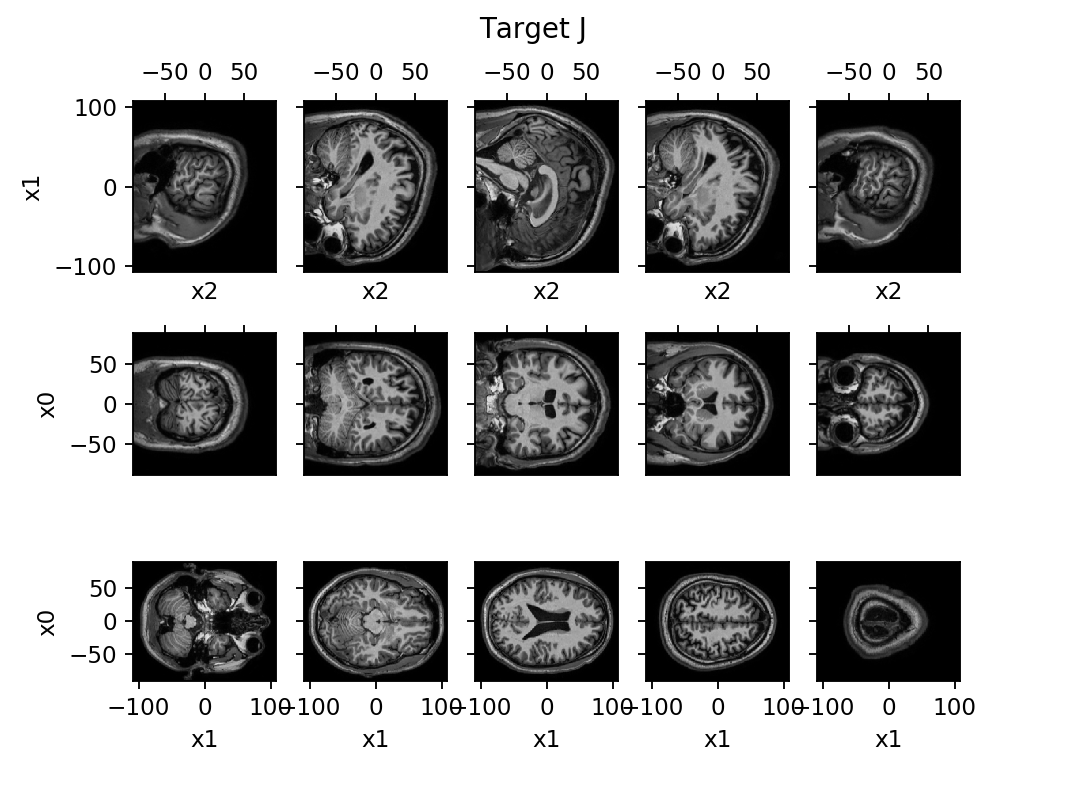

In [8]:
f = plt.figure()
vis.imshow_slices(J,x=x,fig=f)
f.suptitle('Target J')
f.canvas.draw()

## Interpolation
Deformations are compted by interpolating an image at a set of points.  We demonstrate interpolation here:

In [9]:
do_interp_test = False
if do_interp_test:
    # a quick test
    X0,X1,X2 = np.meshgrid(x[0],x[1],x[2],indexing='ij')
    X0tf = tf.constant(X0,dtype=lddmm.dtype)
    X1tf = tf.constant(X1,dtype=lddmm.dtype)
    X2tf = tf.constant(X2,dtype=lddmm.dtype)
    Itf = tf.constant(I,dtype=lddmm.dtype)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        Id = lddmm.interp3(x[0],x[1],x[2],Itf,X0tf+10,X1tf*1.2,(X2tf/x[2][-1])**0.75*x[2][-1])
        Idnp = Id.eval()
    f = plt.figure()
    vis.imshow_slices(Idnp,x=x,fig=f)
    f.suptitle('Example of transforming by interpolation')
    f.canvas.draw()
    

## Gradient
Gradients are required to know how the energy will change when the image moves a small amount.  We demonstrate this here

In [10]:
do_grad_test = False
if do_grad_test:
    # a quick test    
    Itf = tf.constant(I,dtype=lddmm.dtype)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        I_0,I_1,I_2 = lddmm.grad3(Itf,dx)
        Ishow = tf.sqrt(I_0**2 + I_1**2 + I_2**2)
        Ishownp = Ishow.eval()
    f = plt.figure()        
    vis.imshow_slices(Ishownp,x=x,fig=f)
    f.canvas.draw()
    

## LDDMM

Importing helper functions
Set default parameters
Got parameters


<IPython.core.display.Javascript object>


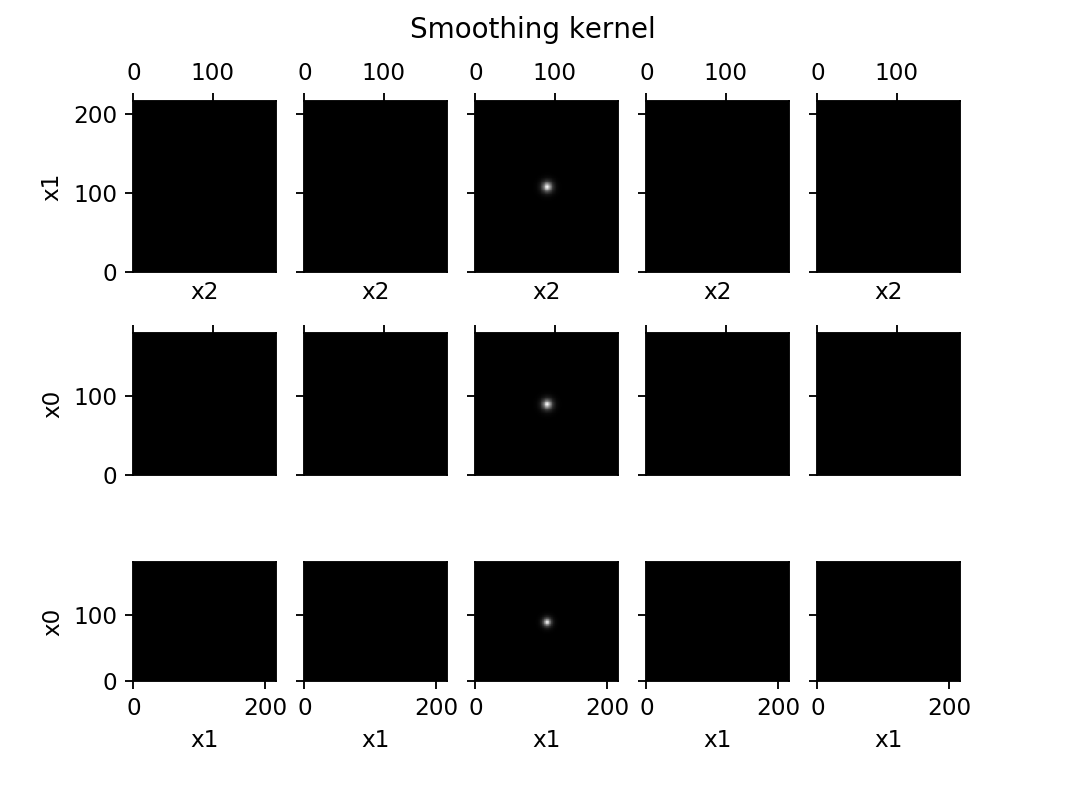

Built energy operators
built tensorflow variables
Computation graph defined


<IPython.core.display.Javascript object>


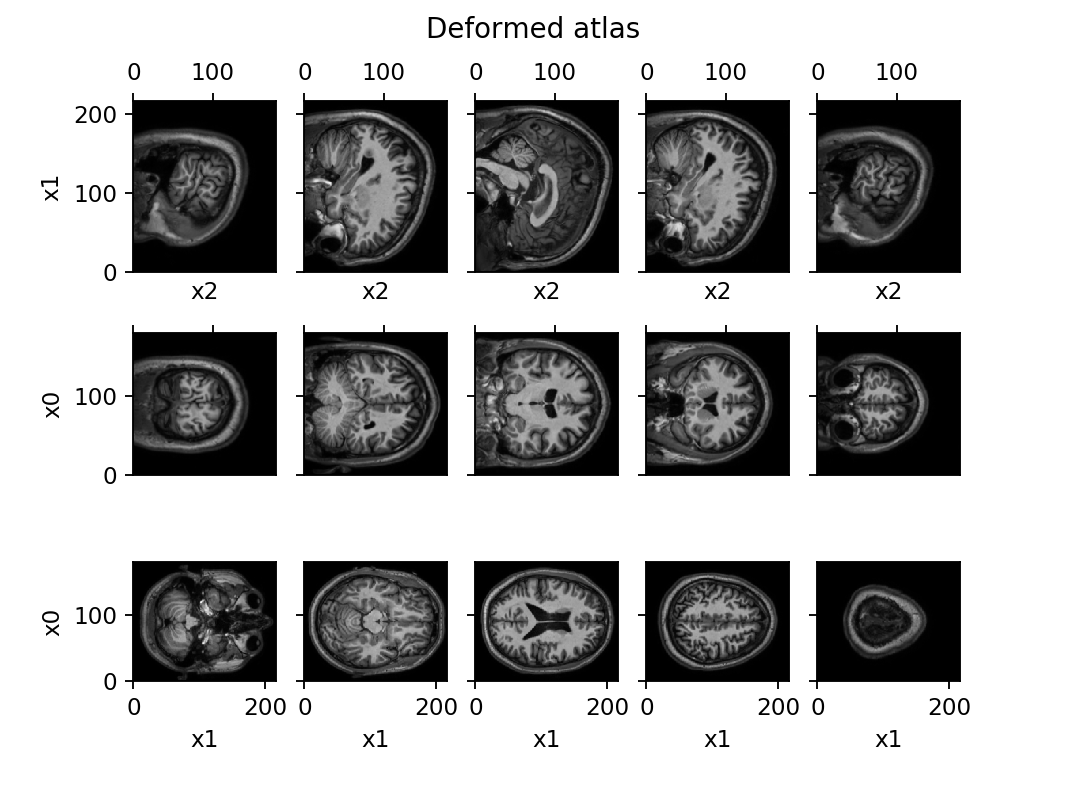

<IPython.core.display.Javascript object>


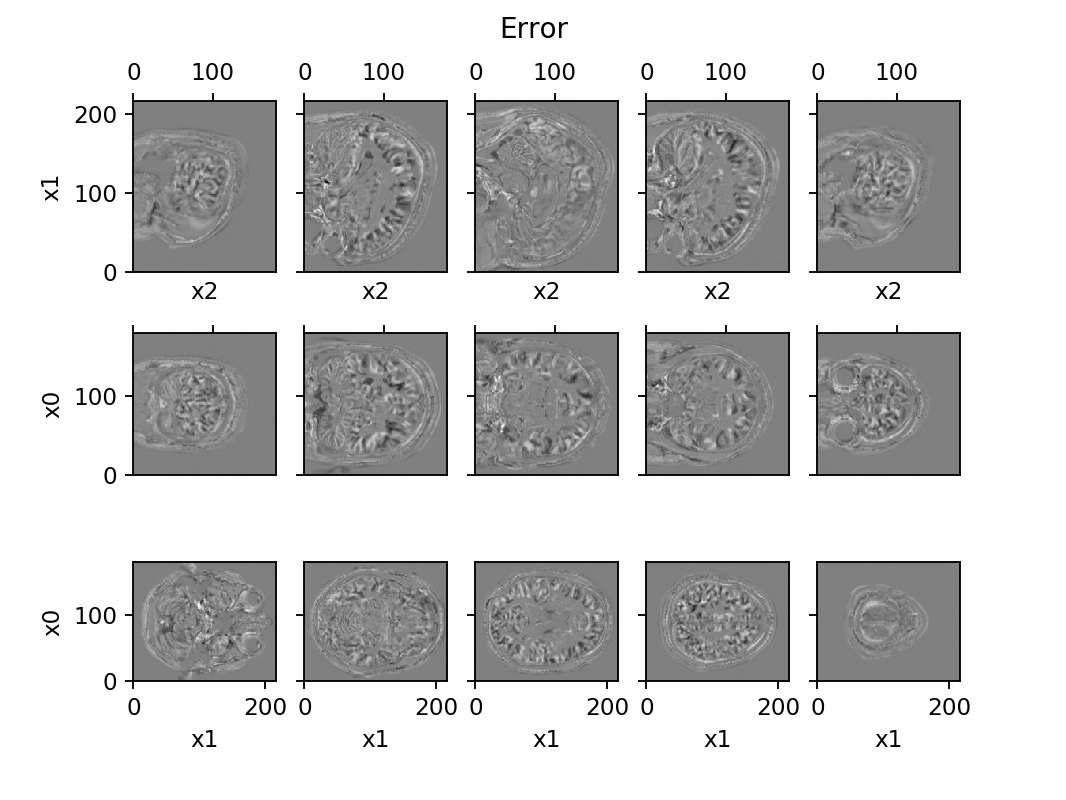

<IPython.core.display.Javascript object>


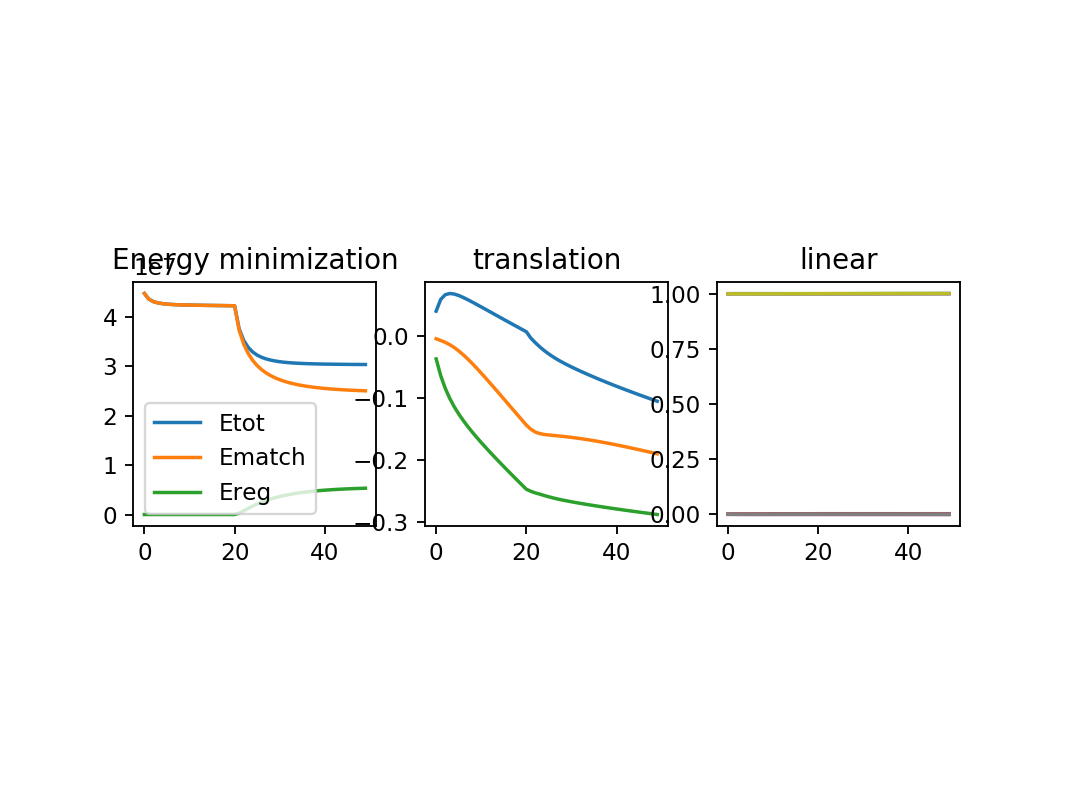

Finished iteration 0, energy 44694201.17675823 (match 44694201.17675823, reg 0.0)
Finished iteration 1, energy 43537514.462732315 (match 43537514.462732315, reg 0.0)
Finished iteration 2, energy 43045736.61340421 (match 43045736.61340421, reg 0.0)
Finished iteration 3, energy 42791496.41889408 (match 42791496.41889408, reg 0.0)
Finished iteration 4, energy 42641191.27220653 (match 42641191.27220653, reg 0.0)
Finished iteration 5, energy 42544315.419582464 (match 42544315.419582464, reg 0.0)
Finished iteration 6, energy 42478365.88928371 (match 42478365.88928371, reg 0.0)
Finished iteration 7, energy 42431510.78023346 (match 42431510.78023346, reg 0.0)
Finished iteration 8, energy 42396993.76009568 (match 42396993.76009568, reg 0.0)
Finished iteration 9, energy 42370592.69554289 (match 42370592.69554289, reg 0.0)
Finished iteration 10, energy 42349219.247626655 (match 42349219.247626655, reg 0.0)
Finished iteration 11, energy 42331228.51475971 (match 42331228.51475971, reg 0.0)
Finished

In [11]:
lddmm = imp.reload(lddmm)
out = lddmm.lddmm(I,J,niter=50,sigmaM=1e1,sigmaR=1e0,epsilon=1e-1,p=2,a=2)

## Example with mouse images


In [12]:
# get filenames
atlas_image_fname = 'PMD2052_orig_target_STS_clean.img'
target_image_fname = 'PMD3097_orig_target_STS_clean.img'

In [13]:
# load them with nababel
fnames = [atlas_image_fname,target_image_fname]
img = [nib.load(fname) for fname in fnames]

In [14]:
# get info about domains
# we assume for this example that we have the same voxel size and same voxel spacing for atlas and target
if '.img' == atlas_image_fname[-4:]:    
    nx = img[0].header['dim'][1:4]
    dx = img[0].header['pixdim'][1:4]
else:
    # I'm only working with analyze for now
    raise ValueError('Only Analyze images supported for now')
x = [np.arange(nxi)*dxi - np.mean(np.arange(nxi)*dxi) for nxi,dxi in zip(nx,dx)]

In [15]:
# get the images, note they also include a fourth axis for time that I don't want
I = img[0].get_data()[:,:,:,0]
J = img[1].get_data()[:,:,:,0]
# in this example, images are the same size
# this can be enfored after affine registration
# In the future, we can implement different sizes

<IPython.core.display.Javascript object>


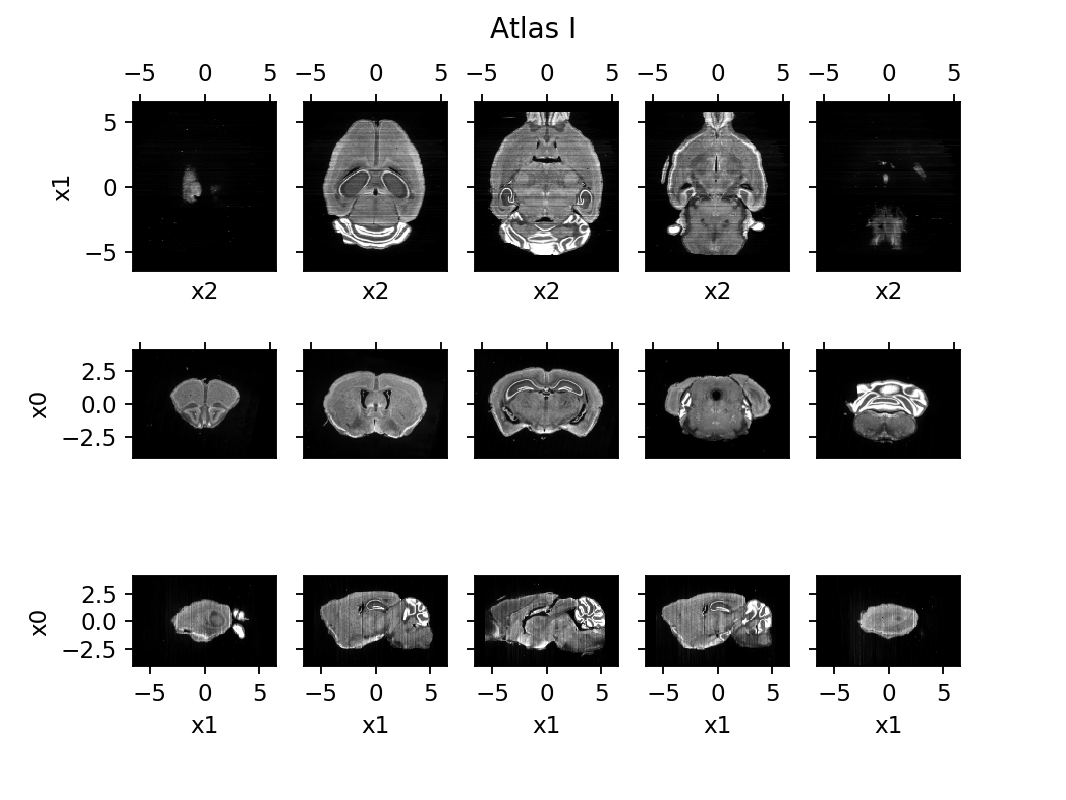

In [16]:
# display the data
f = plt.figure()
vis.imshow_slices(I, x=x, fig=f)
f.suptitle('Atlas I')
f.canvas.draw()

<IPython.core.display.Javascript object>


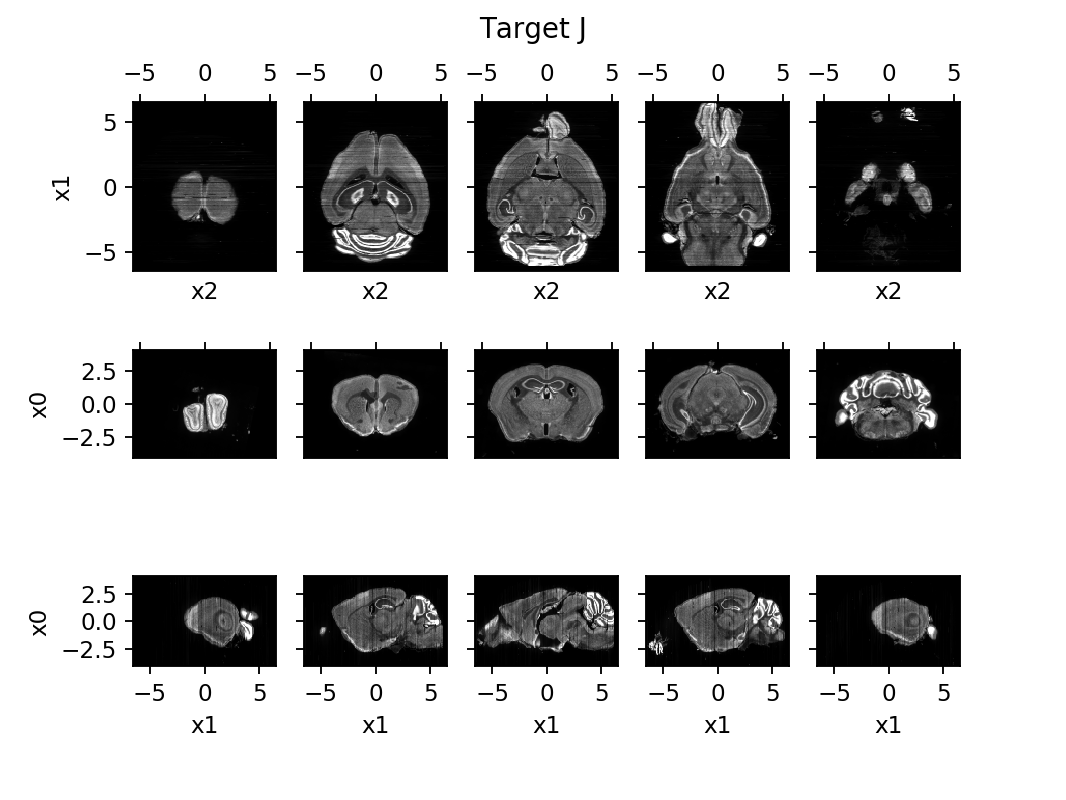

In [17]:
f = plt.figure()
vis.imshow_slices(J,x=x,fig=f)
f.suptitle('Target J')
f.canvas.draw()

Importing helper functions
importing vis
Set default parameters
Got parameters


<IPython.core.display.Javascript object>


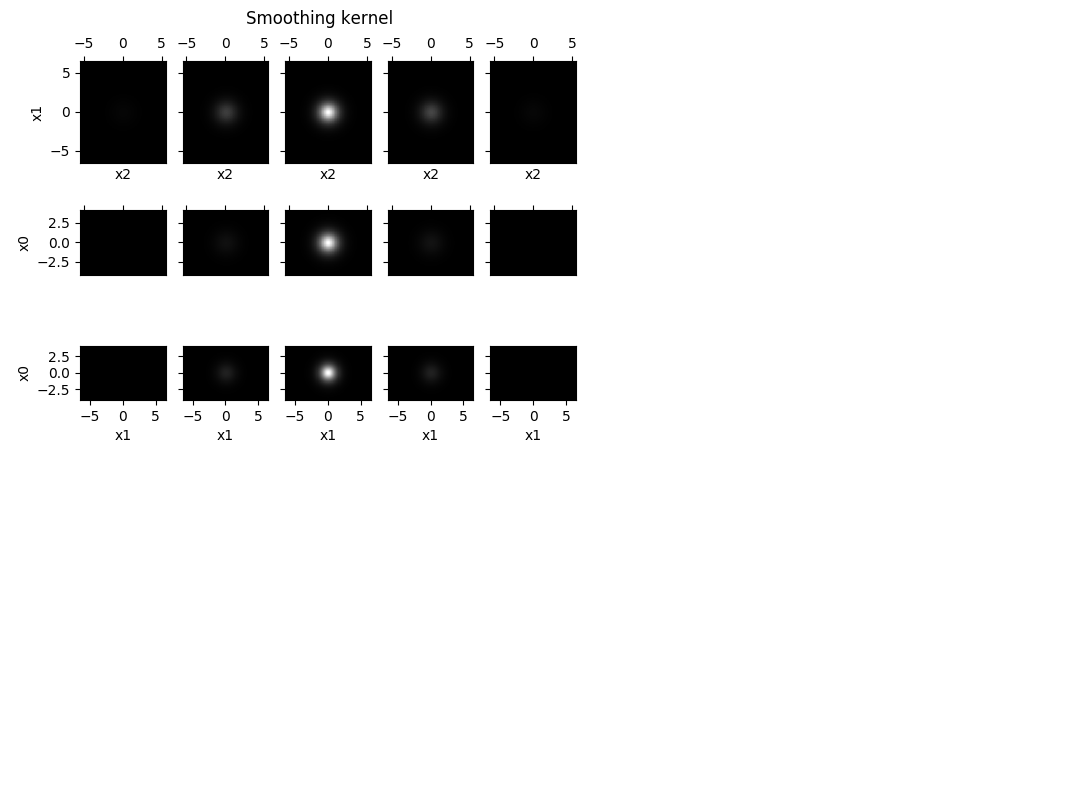

Built energy operators
built tensorflow variables
Computation graph defined


<IPython.core.display.Javascript object>


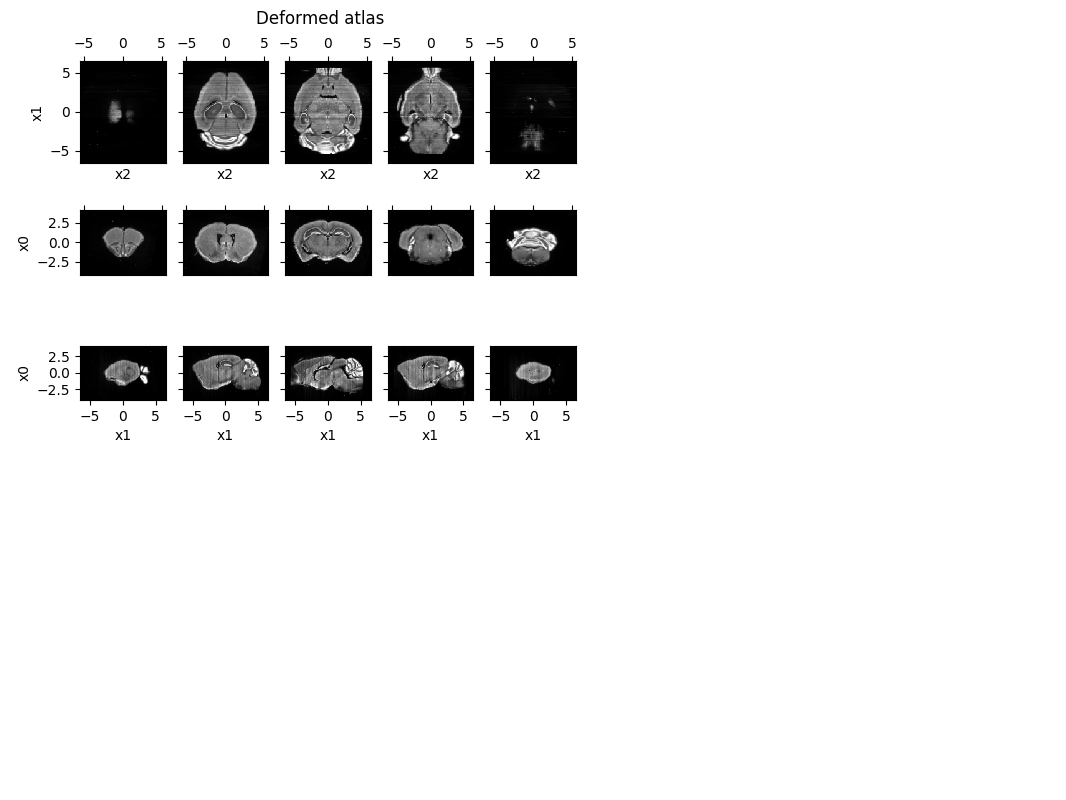

<IPython.core.display.Javascript object>


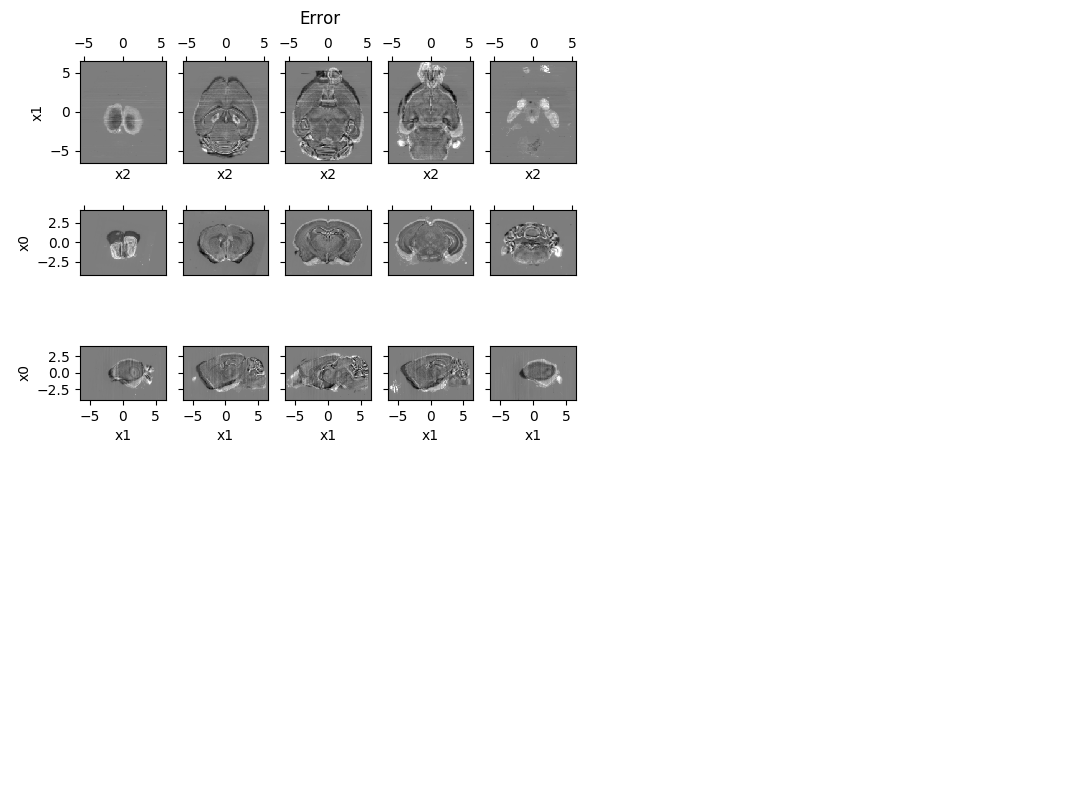

<IPython.core.display.Javascript object>


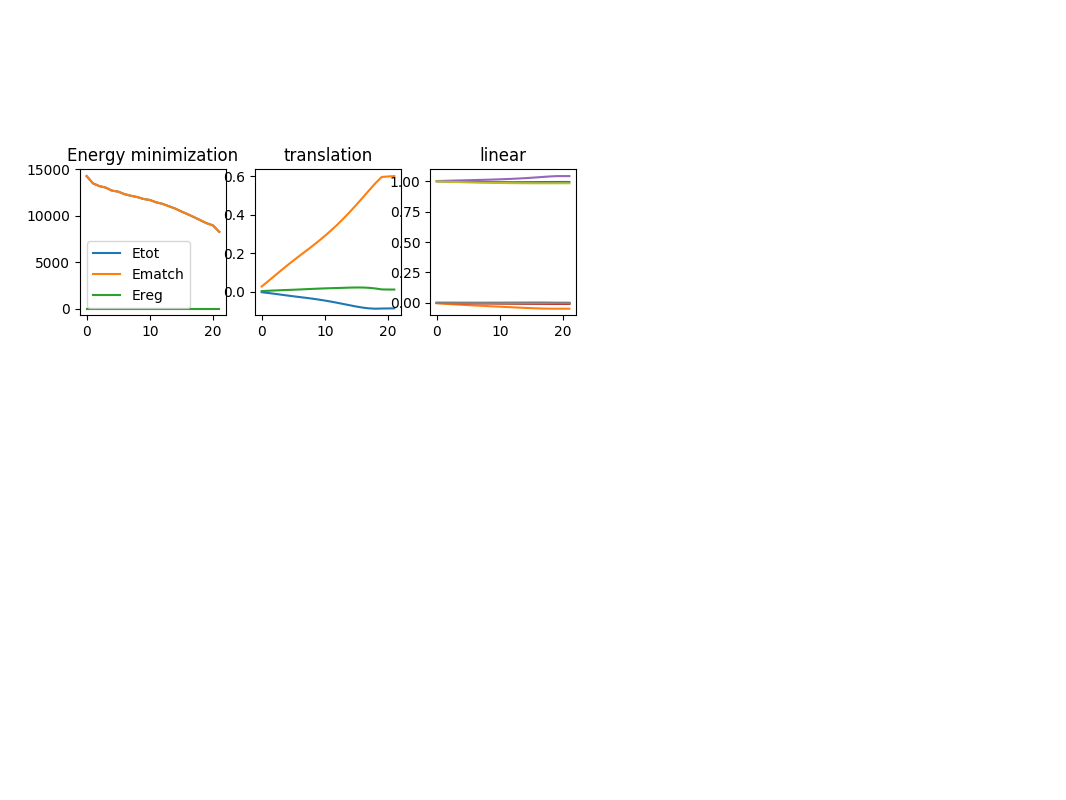

Finished iteration 0, energy 14282.344755581265 (match 14282.344755581265, reg 0.0)
Finished iteration 1, energy 13501.925653568947 (match 13501.925653568947, reg 0.0)
Finished iteration 2, energy 13205.252501343419 (match 13205.252501343419, reg 0.0)
Finished iteration 3, energy 13049.972317688736 (match 13049.972317688736, reg 0.0)
Finished iteration 4, energy 12719.009574461823 (match 12719.009574461823, reg 0.0)
Finished iteration 5, energy 12610.895869350603 (match 12610.895869350603, reg 0.0)
Finished iteration 6, energy 12332.726224174981 (match 12332.726224174981, reg 0.0)
Finished iteration 7, energy 12164.53973115811 (match 12164.53973115811, reg 0.0)
Finished iteration 8, energy 12027.070340494598 (match 12027.070340494598, reg 0.0)
Finished iteration 9, energy 11819.981537361708 (match 11819.981537361708, reg 0.0)
Finished iteration 10, energy 11710.486385323722 (match 11710.486385323722, reg 0.0)
Finished iteration 11, energy 11460.459762453602 (match 11460.459762453602, r

In [ ]:
lddmm = imp.reload(lddmm)
vis = imp.reload(vis)

eV = 2e-3                   
eT = 2e-5
eL = 2e-6
p = 4
p = 2
sigmaM = 10.0
sigmaR = 2e2
eL = 1e-6
eT = 1e-5
eL = 5e-7

out = lddmm.lddmm(I, J, 
                  niter=50, 
                  # the three params below don't work great
                  # the two affine ones work on their own though
                  eV = eV,
                  eT = eT,
                  eL = eL,
                  sigmaM=sigmaM, 
                  sigmaR=sigmaR,
                  xI=x,
                  xJ=x,
                  a=(x[0][1]-x[0][0])*5,
                  p=p)# use quite a big kernel here